# Financial Forecasting Model: Nasdaq 

This notebook will use the Alpaca RESTful API to import 1 minute NASDAQ OHLCV data and train a model to make predictions on stock price behavior.

## Package Imports

### Standard

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf

import os

import yaml

import datetime

2025-05-02 17:36:30.752089: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-02 17:36:30.859149: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-02 17:36:30.925053: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746221790.967219  176011 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746221790.975758  176011 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746221791.053625  176011 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

### Alpaca API Imports

In [2]:
from alpaca.data.historical import StockHistoricalDataClient
from alpaca.data.requests import StockBarsRequest
from alpaca.data.timeframe import TimeFrame

## Import Authentication Keys

In [3]:
with open("../keys.yaml", "r") as file:
  keys = yaml.safe_load(file)

api_key = keys["api_key"]
secret_key = keys["secret_key"]

## Fetch 1-Minute OHLCV Data

In [4]:
# Tickers to include in data
tickers = ["AAPL", "MSFT", "NVDA", "AMZN", "META", "GOOGL", "GOOG", "AVGO", "COST", "NFLX"]

# Start and end dates of data
start_date = datetime.datetime(2022, 1, 1)
end_date = datetime.datetime(2022, 12, 31)

In [5]:
# Initialize the Alpaca API client
client = StockHistoricalDataClient(api_key, secret_key)

# Create request
request_params = [StockBarsRequest(
  symbol_or_symbols=ticker,
  timeframe=TimeFrame.Minute,
  start=start_date,
  end=end_date,
) for ticker in tickers]

In [23]:
# Fetch data: MEMORY INTENSIVE... ONLY RUN IF SURE
if 0:
  i = 0
  bars_arr = [None for _ in tickers]
  for request in request_params:
    print(tickers[i])
    bars_arr[i] = client.get_stock_bars(request).df
    bars_arr[i].to_csv(f"data/{tickers[i]}_1min_ohlcv.csv")
    i += 1
else:
  # This "else" part has not been tested yet...
  bars_arr = [pd.read_csv("./data/" + file) for file in os.listdir("./data")]
  tickers = [bars_arr[i]["symbol"] for i in range(len(bars_arr))]

## Pre-Process Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# TODO: This might not be the correct scaling, because companies are different in size.
features_arr = [bar[["open", "high", "low", "close", "volume"]] for bar in bars_arr]
scaler = MinMaxScaler()
scaled_data_arr = scaler.fit_transform(features_arr)

# Form the input and output structures
def create_sequences():
  

## Data Visualization

Index(['symbol', 'timestamp', 'open', 'high', 'low', 'close', 'volume',
       'trade_count', 'vwap'],
      dtype='object')
[2910.     2908.     2905.     ...   88.36     88.3601   88.4199]


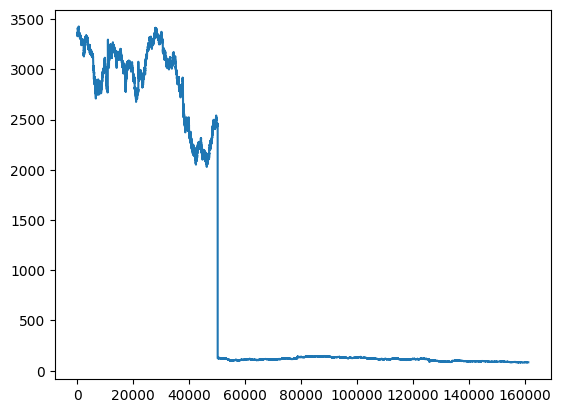

0         AMZN
1         AMZN
2         AMZN
3         AMZN
4         AMZN
          ... 
161142    AMZN
161143    AMZN
161144    AMZN
161145    AMZN
161146    AMZN
Name: symbol, Length: 161147, dtype: object


In [18]:
print(bars_arr[0].columns)
print(bars_arr[0]["close"].values)
plt.figure()
plt.plot(bars_arr[9]["open"].values)
plt.show()
print(bars_arr[9]["symbol"])

## Model Declaration

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [22]:
model = Sequential([
  LSTM(units=50, return_sequences=False, input_shape=()), 
  Dense(1)
])

2025-05-02 17:51:32.060727: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/home/buck_j/dev/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


ValueError: Input 0 of layer "lstm" is incompatible with the layer: expected ndim=3, found ndim=1. Full shape received: (None,)

## Model Training

## Model Testing and Evaluation